<a href="https://colab.research.google.com/github/Eduardodelpinotoro/Ephemeris-Generator/blob/main/C%C3%A1lculo_de_posiciones_futuras_de_asteroides.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduce el número de fechas futuras que deseas calcular:
3
Introduce el número de días de observaciones existentes:
3
Introduce los valores de RA y Dec para el día 1:
RA (hh mm ss.s): 03 03 20.0
Dec (dd mm ss.s): -08 07 56
Introduce los valores de RA y Dec para el día 2:
RA (hh mm ss.s): 03 04 12.1
Dec (dd mm ss.s): -08 23 09
Introduce los valores de RA y Dec para el día 3:
RA (hh mm ss.s): 03 05 03.1
Dec (dd mm ss.s): -08 38 37

Posiciones futuras calculadas:
Día futuro 1: RA = 46.48 grados, Dec = -8.90 grados
Día futuro 2: RA = 46.69 grados, Dec = -9.16 grados
Día futuro 3: RA = 46.90 grados, Dec = -9.42 grados


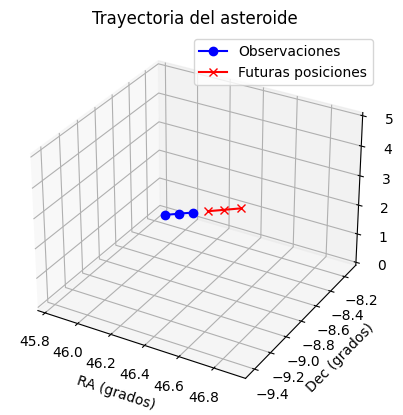

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Función para convertir RA y Dec a grados
def ra_dec_to_degrees(ra_h, ra_m, ra_s, dec_d, dec_m, dec_s):
    ra_degrees = 15 * (ra_h + ra_m / 60 + ra_s / 3600)  # Convertimos RA a grados
    dec_sign = -1 if dec_d < 0 else 1  # Para manejar declinación negativa
    dec_degrees = dec_sign * (abs(dec_d) + dec_m / 60 + dec_s / 3600)  # Convertimos Dec a grados
    return ra_degrees, dec_degrees

# Función para pedir los datos de RA y Dec para varios días
def input_ra_dec(num_dias):
    datos = []
    for i in range(num_dias):
        print(f"Introduce los valores de RA y Dec para el día {i+1}:")
        ra_input = input("RA (hh mm ss.s): ")
        dec_input = input("Dec (dd mm ss.s): ")

        try:
            ra_h, ra_m, ra_s = map(float, ra_input.split())
            dec_d, dec_m, dec_s = map(float, dec_input.split())
        except ValueError:
            print("Error: asegúrate de ingresar las coordenadas en el formato correcto (hh mm ss.s o dd mm ss.s)")
            return None

        ra_degrees, dec_degrees = ra_dec_to_degrees(ra_h, ra_m, ra_s, dec_d, dec_m, dec_s)
        datos.append((ra_degrees, dec_degrees))
    return datos

# Función para extrapolar futuras posiciones
def extrapolate_positions(observaciones, num_futuro):
    # Suponemos una progresión lineal simple para las futuras posiciones (esto puede cambiar con modelos más avanzados)
    ult_ra, ult_dec = observaciones[-1]
    penult_ra, penult_dec = observaciones[-2]

    delta_ra = ult_ra - penult_ra
    delta_dec = ult_dec - penult_dec

    futuras_posiciones = []
    for i in range(1, num_futuro+1):
        nuevas_ra = ult_ra + i * delta_ra
        nuevas_dec = ult_dec + i * delta_dec
        futuras_posiciones.append((nuevas_ra, nuevas_dec))
    return futuras_posiciones

# Función para generar el gráfico 3D
def plot_trajectory(observaciones, futuras_posiciones):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Datos observacionales
    ra_obs = [obs[0] for obs in observaciones]
    dec_obs = [obs[1] for obs in observaciones]
    dist_obs = np.arange(len(observaciones))  # Para simular la distancia

    # Datos futuros
    ra_fut = [fut[0] for fut in futuras_posiciones]
    dec_fut = [fut[1] for fut in futuras_posiciones]
    dist_fut = np.arange(len(observaciones), len(observaciones) + len(futuras_posiciones))

    # Graficamos las observaciones
    ax.plot(ra_obs, dec_obs, dist_obs, label="Observaciones", color='blue', marker='o')

    # Graficamos las posiciones futuras
    ax.plot(ra_fut, dec_fut, dist_fut, label="Futuras posiciones", color='red', marker='x')

    ax.set_xlabel('RA (grados)')
    ax.set_ylabel('Dec (grados)')
    ax.set_zlabel('Distancia simulada')

    plt.title('Trayectoria del asteroide')
    plt.legend()
    plt.show()

# Programa principal
def main():
    print("Introduce el número de fechas futuras que deseas calcular:")
    num_futuro = int(input())

    print("Introduce el número de días de observaciones existentes:")
    num_dias = int(input())

    # Introducir datos de RA y Dec para los días dados
    observaciones = input_ra_dec(num_dias)

    if observaciones is None:
        return  # Termina si hay un error en la entrada

    # Calcular posiciones futuras
    futuras_posiciones = extrapolate_positions(observaciones, num_futuro)

    # Mostrar las posiciones futuras
    print("\nPosiciones futuras calculadas:")
    for i, pos in enumerate(futuras_posiciones):
        ra, dec = pos
        print(f"Día futuro {i+1}: RA = {ra:.2f} grados, Dec = {dec:.2f} grados")

    # Generar gráfico 3D de la trayectoria
    plot_trajectory(observaciones, futuras_posiciones)

# Ejecutar el programa
if __name__ == "__main__":
    main()


Introduce el número de fechas futuras que deseas calcular:
3
Introduce el número de días de observaciones existentes:
3
Introduce los valores de RA y Dec para el día 1:
RA (hh mm ss.s): 03 03 20.0
Dec (dd mm ss.s): -08 07 56
Introduce los valores de RA y Dec para el día 2:
RA (hh mm ss.s): 03 04 12.1
Dec (dd mm ss.s): -08 23 09
Introduce los valores de RA y Dec para el día 3:
RA (hh mm ss.s): 03 05 03.1
Dec (dd mm ss.s): -08 38 37

Posiciones futuras calculadas:
Día futuro 1:
RA = 46.48 grados, Dec = -8.90 grados
RA (formato hh mm ss) = 3h 5m 54.10s
Dec (formato dd mm ss) = -8° 54' 5.00''

Día futuro 2:
RA = 46.69 grados, Dec = -9.16 grados
RA (formato hh mm ss) = 3h 6m 45.10s
Dec (formato dd mm ss) = -9° 9' 33.00''

Día futuro 3:
RA = 46.90 grados, Dec = -9.42 grados
RA (formato hh mm ss) = 3h 7m 36.10s
Dec (formato dd mm ss) = -9° 25' 1.00''



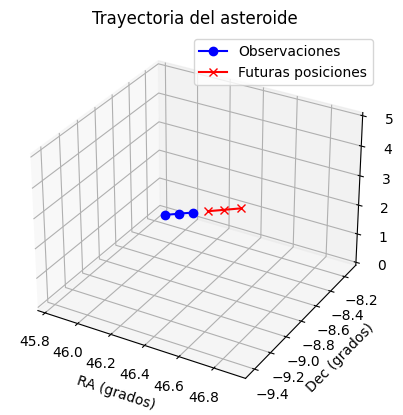

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Función para convertir RA y Dec a grados
def ra_dec_to_degrees(ra_h, ra_m, ra_s, dec_d, dec_m, dec_s):
    ra_degrees = 15 * (ra_h + ra_m / 60 + ra_s / 3600)  # Convertimos RA a grados
    dec_sign = -1 if dec_d < 0 else 1  # Para manejar declinación negativa
    dec_degrees = dec_sign * (abs(dec_d) + dec_m / 60 + dec_s / 3600)  # Convertimos Dec a grados
    return ra_degrees, dec_degrees

# Función para convertir de grados a RA (horas, minutos, segundos) y Dec (grados, minutos, segundos)
def degrees_to_ra_dec(ra_degrees, dec_degrees):
    # RA: De grados a horas, minutos, segundos
    ra_total_hours = ra_degrees / 15
    ra_h = int(ra_total_hours)
    ra_m = int((ra_total_hours - ra_h) * 60)
    ra_s = (ra_total_hours - ra_h - ra_m / 60) * 3600

    # Dec: De grados a grados, minutos, segundos
    dec_sign = -1 if dec_degrees < 0 else 1
    dec_total_degrees = abs(dec_degrees)
    dec_d = int(dec_total_degrees) * dec_sign
    dec_m = int((dec_total_degrees - abs(dec_d)) * 60)
    dec_s = (dec_total_degrees - abs(dec_d) - dec_m / 60) * 3600

    return (ra_h, ra_m, ra_s), (dec_d, dec_m, dec_s)

# Función para pedir los datos de RA y Dec para varios días
def input_ra_dec(num_dias):
    datos = []
    for i in range(num_dias):
        print(f"Introduce los valores de RA y Dec para el día {i+1}:")
        ra_input = input("RA (hh mm ss.s): ")
        dec_input = input("Dec (dd mm ss.s): ")

        try:
            ra_h, ra_m, ra_s = map(float, ra_input.split())
            dec_d, dec_m, dec_s = map(float, dec_input.split())
        except ValueError:
            print("Error: asegúrate de ingresar las coordenadas en el formato correcto (hh mm ss.s o dd mm ss.s)")
            return None

        ra_degrees, dec_degrees = ra_dec_to_degrees(ra_h, ra_m, ra_s, dec_d, dec_m, dec_s)
        datos.append((ra_degrees, dec_degrees))
    return datos

# Función para extrapolar futuras posiciones
def extrapolate_positions(observaciones, num_futuro):
    ult_ra, ult_dec = observaciones[-1]
    penult_ra, penult_dec = observaciones[-2]

    delta_ra = ult_ra - penult_ra
    delta_dec = ult_dec - penult_dec

    futuras_posiciones = []
    for i in range(1, num_futuro+1):
        nuevas_ra = ult_ra + i * delta_ra
        nuevas_dec = ult_dec + i * delta_dec
        futuras_posiciones.append((nuevas_ra, nuevas_dec))
    return futuras_posiciones

# Función para generar el gráfico 3D
def plot_trajectory(observaciones, futuras_posiciones):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Datos observacionales
    ra_obs = [obs[0] for obs in observaciones]
    dec_obs = [obs[1] for obs in observaciones]
    dist_obs = np.arange(len(observaciones))  # Para simular la distancia

    # Datos futuros
    ra_fut = [fut[0] for fut in futuras_posiciones]
    dec_fut = [fut[1] for fut in futuras_posiciones]
    dist_fut = np.arange(len(observaciones), len(observaciones) + len(futuras_posiciones))

    # Graficamos las observaciones
    ax.plot(ra_obs, dec_obs, dist_obs, label="Observaciones", color='blue', marker='o')

    # Graficamos las posiciones futuras
    ax.plot(ra_fut, dec_fut, dist_fut, label="Futuras posiciones", color='red', marker='x')

    ax.set_xlabel('RA (grados)')
    ax.set_ylabel('Dec (grados)')
    ax.set_zlabel('Distancia simulada')

    plt.title('Trayectoria del asteroide')
    plt.legend()
    plt.show()

# Programa principal
def main():
    print("Introduce el número de fechas futuras que deseas calcular:")
    num_futuro = int(input())

    print("Introduce el número de días de observaciones existentes:")
    num_dias = int(input())

    # Introducir datos de RA y Dec para los días dados
    observaciones = input_ra_dec(num_dias)

    if observaciones is None:
        return  # Termina si hay un error en la entrada

    # Calcular posiciones futuras
    futuras_posiciones = extrapolate_positions(observaciones, num_futuro)

    # Mostrar las posiciones futuras en grados y en formato RA/Dec
    print("\nPosiciones futuras calculadas:")
    for i, pos in enumerate(futuras_posiciones):
        ra_deg, dec_deg = pos
        (ra_h, ra_m, ra_s), (dec_d, dec_m, dec_s) = degrees_to_ra_dec(ra_deg, dec_deg)
        print(f"Día futuro {i+1}:")
        print(f"RA = {ra_deg:.2f} grados, Dec = {dec_deg:.2f} grados")
        print(f"RA (formato hh mm ss) = {int(ra_h)}h {int(ra_m)}m {ra_s:.2f}s")
        print(f"Dec (formato dd mm ss) = {int(dec_d)}° {int(dec_m)}' {dec_s:.2f}''\n")

    # Generar gráfico 3D de la trayectoria
    plot_trajectory(observaciones, futuras_posiciones)

# Ejecutar el programa
if __name__ == "__main__":
    main()
